In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_trainN = tf.keras.utils.normalize(x_train, axis=1)
x_testN = tf.keras.utils.normalize(x_test, axis=1)

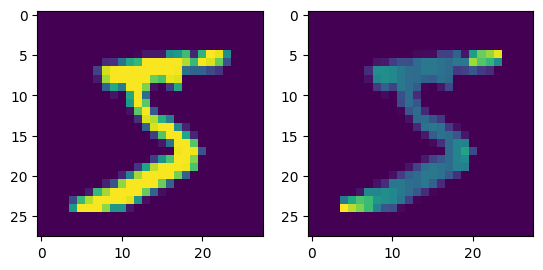

In [4]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.imshow(x_train[0])

plt.subplot(122)
plt.imshow(x_trainN[0])

In [5]:
x_train, x_test = x_trainN, x_testN

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2625 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1099 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0761 - accuracy: 0.9755


In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9735
0.09300146996974945 0.9735000133514404


In [8]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


INFO:tensorflow:Assets written to: num_reader.model\assets


In [9]:
new_model = tf.keras.models.load_model('num_reader.model')

In [10]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


(array([9., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.34839930e-13, 9.99977738e-02, 1.99995548e-01, 2.99993306e-01,
        3.99991095e-01, 4.99988854e-01, 5.99986613e-01, 6.99984372e-01,
        7.99982190e-01, 8.99979949e-01, 9.99977708e-01]),
 <BarContainer object of 10 artists>)

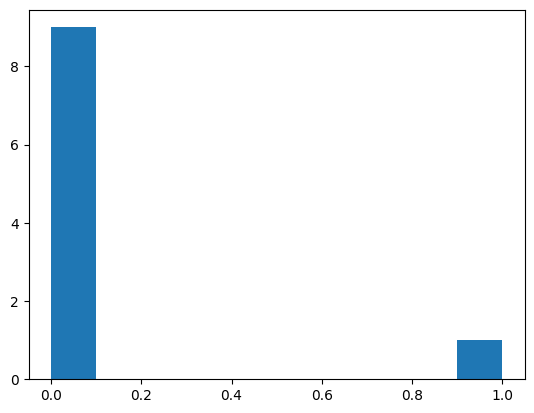

In [11]:
plt.hist(predictions[0])

5


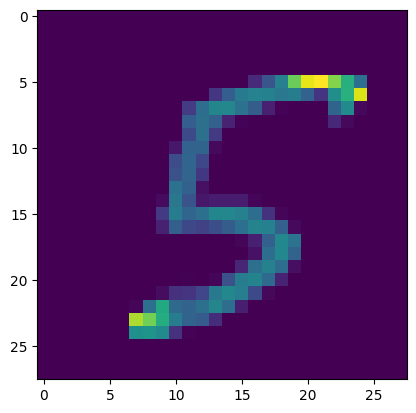

In [12]:
import numpy as np
print(np.argmax(predictions[23]))
plt.imshow(x_test[23])